In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

C:\Users\Thaomy\AppData\Local\Temp\ipykernel_12368\3931774622.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Linear modeling in python - EPA AQS Data
2. When I trained on 80% of the data and tested on 20%, I got a Mean Squared Error of 3.23e-05 ppm^2 (or 0.00569 ppm after square root).
3. I think the linear model did peform well to predict the test, since the MSE of the tested data did not differ much from the MSE when I used the entire data set. Additionally, I think an error of +/- 0.00569 ppm is relatively small compared to the range of O3 concentrations from 0 to 0.046 ppm.

In [2]:
df = pd.read_csv('LA_AQS_2023.csv')

In [3]:
df_O3 = df[(df['Parameter Name']=='Ozone') & (df['Duration Description']=='1 HOUR')]
df_NO2 = df[(df['Parameter Name']=='Nitrogen dioxide (NO2)') & (df['Duration Description']=='1 HOUR')]

In [4]:
df_1 = df_O3[['Arithmetic Mean','Date (Local)']].copy()
df_1.rename(columns={'Arithmetic Mean':'O3'}, inplace=True)

df_2 = df_NO2[['Arithmetic Mean','Date (Local)']].copy()
df_2.rename(columns={'Arithmetic Mean':'NO2'}, inplace=True)

df_all = df_1.merge(df_2, on=['Date (Local)'])

In [5]:
print('Type of df: ', type(df_all))
print('Type of df: ', type(df_all['O3']))
print('Type of df: ', type(df_all['NO2']))

Type of df:  <class 'pandas.core.frame.DataFrame'>
Type of df:  <class 'pandas.core.series.Series'>
Type of df:  <class 'pandas.core.series.Series'>


In [6]:
# O3 will be my y and NO2 will be my x
xVal = np.array(df_all['NO2']).reshape((-1, 1))
yVal = np.array(df_all['O3'])

In [7]:
xVal

array([[4.816667],
       [4.55    ],
       [4.55    ],
       ...,
       [6.370833],
       [7.3625  ],
       [7.3625  ]])

In [8]:
yVal

array([0.031708, 0.031708, 0.031708, ..., 0.030042, 0.030042, 0.030042])

In [9]:
reg = linear_model.LinearRegression()
reg.fit(xVal,yVal)
print("Coefficients: \n", reg.coef_)
print("Intercept: \n", reg.intercept_)

Coefficients: 
 [-0.00080499]
Intercept: 
 0.0386457211632062


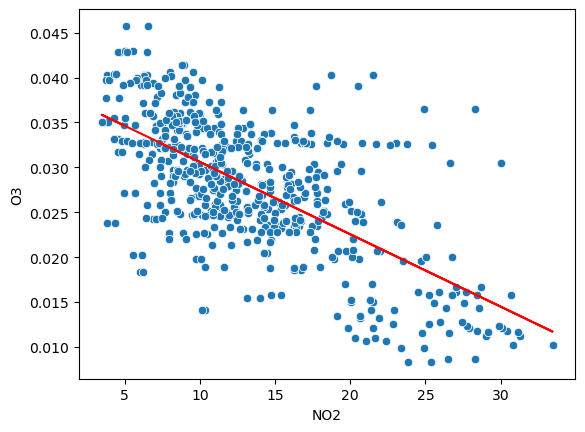

In [10]:
yPred = reg.predict(xVal)
df_all['yPred'] = yPred
sns.scatterplot(data=df_all, x="NO2", y="O3")
plt.plot(df_all['NO2'], df_all['yPred'], color='r')

In [11]:
mse = mean_squared_error(df_all['O3'],df_all['yPred'])
print(mse, np.sqrt(mse))

3.197692798303184e-05 0.00565481458431944


#### 1. Fit a line* between O3 and NO2. Train on 80% of the data, test on 20%.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(xVal, yVal, test_size=0.20)

In [13]:
reg1 = linear_model.LinearRegression()
reg1.fit(X_train,y_train)
print("Coefficients: \n", reg1.coef_)
print("Intercept: \n", reg1.intercept_)

Coefficients: 
 [-0.00080859]
Intercept: 
 0.03861956532351499


In [14]:
df_test = pd.DataFrame({'x' : X_test.ravel(), 'y' : y_test.ravel()})
df_test['yPred'] = reg1.predict(X_test)

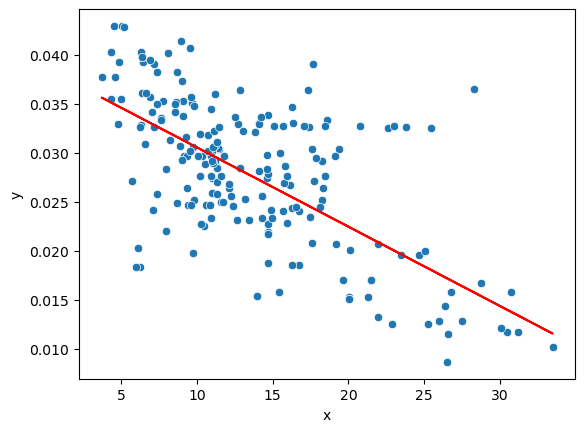

In [15]:
sns.scatterplot(data=df_test, x="x", y="y")
plt.plot(df_test['x'], df_test['yPred'], color='r')

In [16]:
mse1 = mean_squared_error(df_test['y'],df_test['yPred'])

In [17]:
print(mse1, np.sqrt(mse1))

3.234925141420952e-05 0.005687640232487417


## Mauna Loa CO2
2. When I trained on data before year 2000 and tested on data during and after year 2000, I got a Mean Squared Error of 200.25 ppm^2 (or 14.15 ppm after square root).
3. I don't think a linear model to predict the test performed very well, since the MSE of only the tested data is much higher than the MSE of the whole dataset. An error of 14.15 ppm for a dataset that ranges from 365-425 ppm is quite large (the error takes up ~24% of the range). Additionally, it's easy to qualitatively see that the line will depart from the measurments more over time.

In [18]:
dfm = pd.read_csv('ManuaLoa_CO2.csv')

In [19]:
print('Type of df: ', type(dfm))
print('Type of df: ', type(dfm['average']))
print('Type of df: ', type(dfm['decimal date']))

Type of df:  <class 'pandas.core.frame.DataFrame'>
Type of df:  <class 'pandas.core.series.Series'>
Type of df:  <class 'pandas.core.series.Series'>


In [20]:
# CO2 will be my y and decimal date will be my x
xVal2 = np.array(dfm['decimal date']).reshape((-1, 1))
yVal2 = np.array(dfm['average'])

In [21]:
reg2 = linear_model.LinearRegression()
reg2.fit(xVal2,yVal2)
print("Coefficients: \n", reg2.coef_)
print("Intercept: \n", reg2.intercept_)

Coefficients: 
 [1.63015886]
Intercept: 
 -2887.065344584823


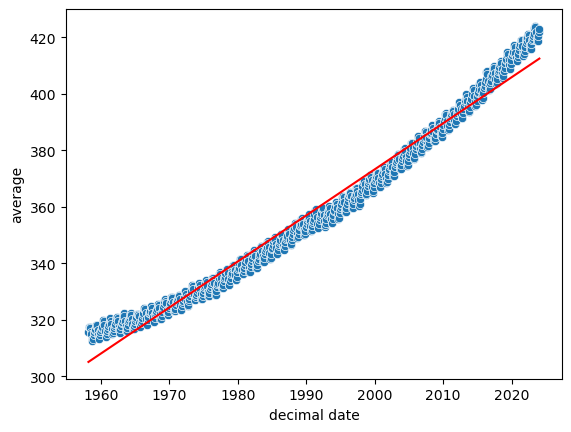

In [22]:
yPred2 = reg2.predict(xVal2)
dfm['yPred'] = yPred2
sns.scatterplot(data=dfm, x="decimal date", y="average")
plt.plot(dfm['decimal date'], dfm['yPred'], color='r')

In [23]:
mse2 = mean_squared_error(dfm['average'],dfm['yPred'])
print(mse2, np.sqrt(mse2))

23.15293215983336 4.811749386640305


#### 1. Fit a linear model* of CO2 vs. time (decimal date) using data before 2000. 

In [24]:
df_before = dfm[dfm['decimal date'] < 2000]
df_after = dfm[dfm['decimal date'] >= 2000]

In [25]:
# CO2 will be my y and decimal date will be my x
X_train2 = np.array(df_before['decimal date']).reshape((-1, 1))
X_test2 = np.array(df_after['decimal date']).reshape((-1,1))
y_train2 = np.array(df_before['average'])
y_test2 = np.array(df_after['average'])

In [26]:
reg3 = linear_model.LinearRegression()
reg3.fit(X_train2,y_train2)
print("Coefficients: \n", reg3.coef_)
print("Intercept: \n", reg3.intercept_)

Coefficients: 
 [1.32328923]
Intercept: 
 -2280.591072256732


In [27]:
dfm_test = pd.DataFrame({'x' : X_test2.ravel(), 'y' : y_test2.ravel()})
dfm_test['yPred'] = reg3.predict(X_test2)

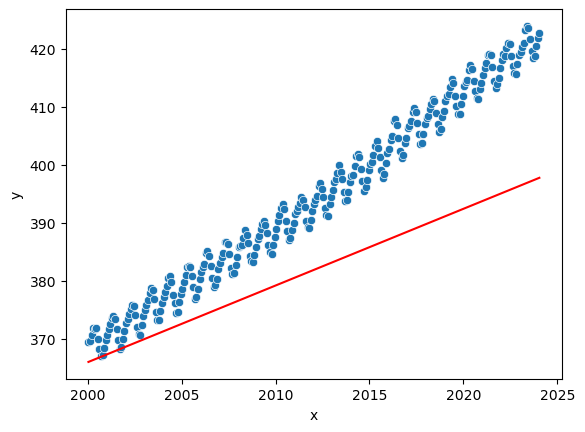

In [28]:
sns.scatterplot(data=dfm_test, x="x", y="y")
plt.plot(dfm_test['x'], dfm_test['yPred'], color='r')

In [29]:
mse2 = mean_squared_error(dfm_test['y'],dfm_test['yPred'])
print(mse2, np.sqrt(mse2))

200.2461711097249 14.150836410252396
